In [1]:
import pandas as pd                 # Our pandas package
from pandas_datareader import data  # This is will give us access to FRED
import datetime as dt               # This will get us the datatime package
import matplotlib.pyplot as plt     # The new package we are learning about Matplotlib
                                    # pyplot is just one module of many in this library

%matplotlib inline 
# This line tells jupyter to plot the graphs within the notebook

In [3]:
start = dt.datetime(2000,1,1) # Our start date

codes = ["GDPC1", "PCECC96", "GPDIC1", "GCEC1","EXPGSC1","IMPGSC1"] # Our codes

usdata = data.DataReader(codes, "fred", start)                 # Read  in the data

usdata.columns = ["gdp", "cons","invs", "gov", "exp", "imp"]   # Rename the columns in a simple way

usdata["nx"] = usdata.exp - usdata.imp                         # Create the net exports column

Create Growth rates

In [4]:
var_list = ["gdp", "cons","invs", "gov", "nx"]

for var in var_list:
    new_name = var + "_growth"
    usdata[new_name] = 100*4*usdata[var].pct_change()
    
usdata.head()

,gdp,cons,invs,gov,exp,imp,nx,gdp_growth,cons_growth,invs_growth,gov_growth,nx_growth
DATE,,,,,,,,,,,,
2000-01-01,12359.095,8054.859,2287.827,2476.222,1219.158,1668.146,-448.988,NaN,NaN,NaN,NaN,NaN
2000-04-01,12592.530,8132.194,2424.549,2506.392,1254.745,1719.607,-464.862,7.555084,3.840415,23.904255,4.873553,14.142026
2000-07-01,12607.676,8211.276,2394.141,2501.218,1285.516,1779.038,-493.522,0.481111,3.889824,-5.016686,-0.825729,24.661082
2000-10-01,12679.338,8284.400,2395.566,2508.965,1274.312,1778.071,-503.759,2.273599,3.562126,0.238081,1.238916,8.297097
2001-01-01,12643.283,8319.403,2285.261,2546.270,1254.496,1748.467,-493.971,-1.137441,1.690068,-18.418194,5.947472,-7.771970


## Multiple plots

Lets explore this...

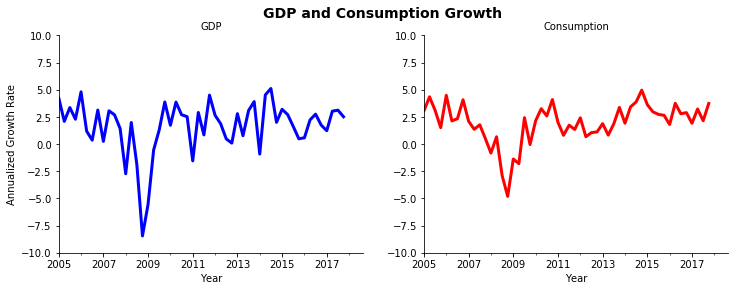

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

usdata.gdp_growth.plot(ax = ax[0], color = 'b', linewidth = 3.0)

usdata.cons_growth.plot(ax = ax[1], color = 'r', linewidth = 3.0)

#ax[1].plot(usdata.cons_growth, color = 'r', linewidth = 3.0) 
#ax[0].plot(usdata.index,usdata.gdp_growth, color = 'b', linewidth = 3.0) 

fig.suptitle("GDP and Consumption Growth", fontsize = 14, fontweight = "bold")

ax[0].set_title("GDP", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption", fontsize = 10)

# The command above we needed to do element by element, but lets automate some other things...

for var in ax: # Think through what this is doing, for every instance of ax called var we will
    
    var.set_ylim(-10,10)  # set the ylimits
    
    var.spines["right"].set_visible(False) # remove the top and right spines
    
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") # set the x label to year
    
    var.set_xlim(dt.datetime(2005,1,1)) # set the x limit to 2005, Jan, 1

    
ax[0].set_ylabel("Annualized Growth Rate") # Lable the y axis (only once since its the same for both)


plt.show()


Now lets combine the line and the scatter. So put the consumption on top of gpd, and then the left panel is the scatter plot

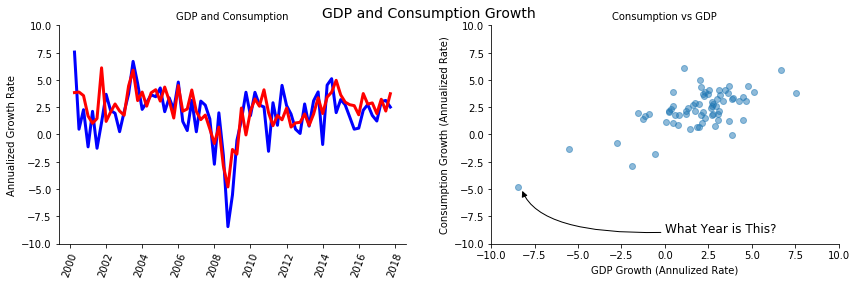

In [68]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# the sharex command tells it to share the same x-axis, the figsize is awayt to controll
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

###############################################################################################

ax[0].plot(pd.to_datetime(usdata.index), usdata.gdp_growth, color = 'b', linewidth = 3.0)
ax[0].plot(pd.to_datetime(usdata.index), usdata.cons_growth, color = 'r', linewidth = 3.0)

ax[0].set_title("GDP and Consumption", fontsize = 10) # This stuff sets the title for each of the subplots...

ax[0].tick_params(axis='x', rotation=70)

ax[0].set_ylabel("Annualized Growth Rate") # Lable the y axis (only once since its the same for both)

###############################################################################################
ax[1].set_ylim(-10,10) # Make this a box...why, one can then by eye infer the slope...
ax[1].set_xlim(-10,10) # 
ax[1].scatter(usdata["gdp_growth"], usdata["cons_growth"], alpha = 0.50) # Then this last command 

#specifies how dark or light the bubbles are...

ax[1].set_title("Consumption vs GDP", fontsize = 10)

ax[1].set_xlabel("GDP Growth (Annulized Rate)")
ax[1].set_ylabel("Consumption Growth (Annualized Rate)")

###############################################################################################

for var in ax: # Think through what this is doing, for every instance of ax called var we will
    
    var.spines["right"].set_visible(False) # remove the top and right spines
    
    var.spines["top"].set_visible(False)
    
    var.set_ylim(-10,10) # Make this a box...why, one can then by eye infer the slope...

###########################################################################################    

fig.suptitle("GDP and Consumption Growth\n", fontsize = 14)   

fig.tight_layout(w_pad=3) 

###########################################################################################

ax[1].annotate(
    "What Year is This?", 
    xy=(-8.25, -5), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(0, -9), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12,
)
    
    
plt.show()